In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
df = pd.read_csv('housing.csv')
df.head()

,Longitude,Latitude,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,SalePrice
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitude   20640 non-null  float64
 1   Latitude    20640 non-null  float64
 2   HouseAge    20640 non-null  int64  
 3   AveRooms    20640 non-null  int64  
 4   AveBedrms   20433 non-null  float64
 5   Population  20640 non-null  int64  
 6   AveOccup    20640 non-null  int64  
 7   MedInc      20640 non-null  float64
 8   SalePrice   20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [8]:
df.describe()

,Longitude,Latitude,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'HouseAge'}>],
       [<AxesSubplot:title={'center':'AveRooms'}>,
        <AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':'AveOccup'}>,
        <AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

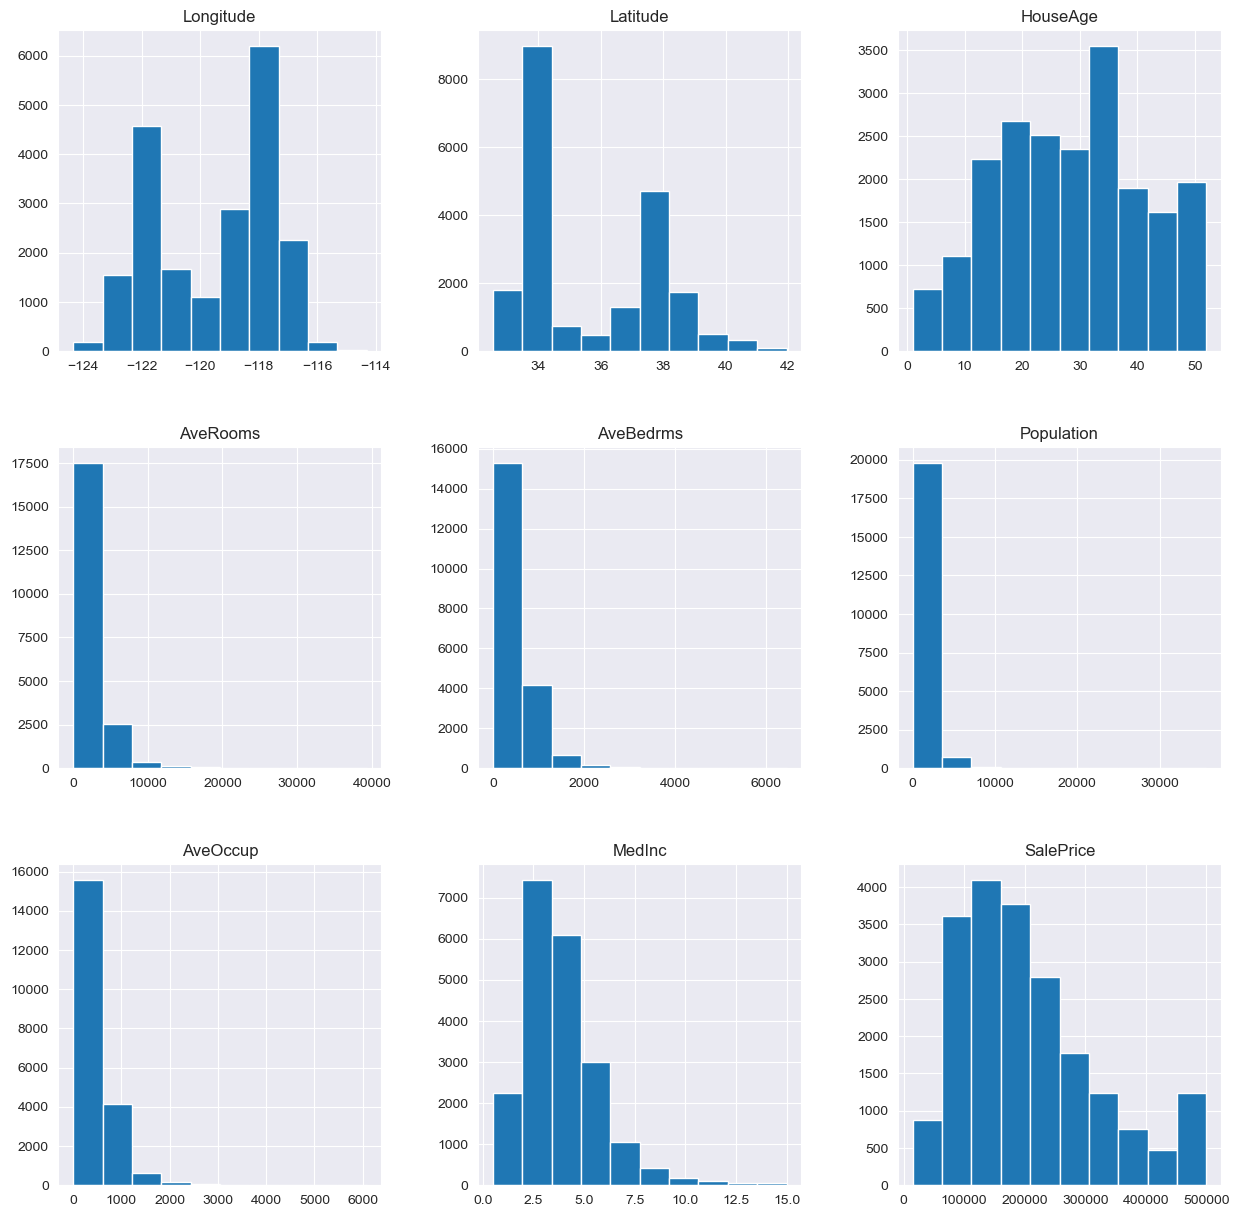

In [9]:
df.hist(figsize=(15,15))

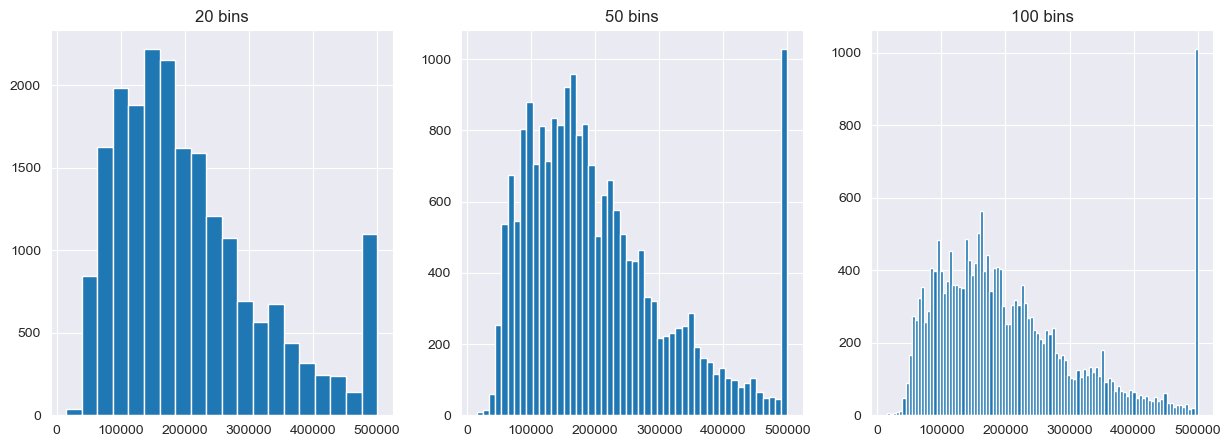

In [10]:
fig, axes = plt.subplots(1, 3 , figsize = (15,5) )
axes[0].hist(df['SalePrice'],bins =20)
axes[1].hist(df['SalePrice'],bins =50)
axes[2].hist(df['SalePrice'] ,bins =100)
axes[0].set_title("20 bins")
axes[1].set_title("50 bins")
axes[2].set_title("100 bins")

plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

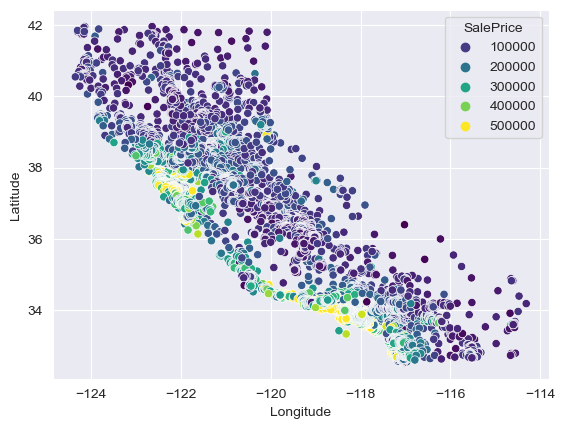

In [11]:
sns.scatterplot(x='Longitude', y='Latitude' , data = df,hue = 'SalePrice',palette='viridis')

In [12]:
from IPython.display import HTML
HTML('<iframe src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d6509916.957423575!2d-123.79759793610344!3d37.18430344877116!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x808fb9fe5f285e3d%3A0x8b5109a227086f55!2sCalifornia%2C%20USA!5e0!3m2!1sen!2sil!4v1612700305502!5m2!1sen!2sil" width="800" height="600" frameborder="0" style="border:0;" allowfullscreen="" aria-hidden="false" tabindex="0"></iframe>')

<AxesSubplot:>

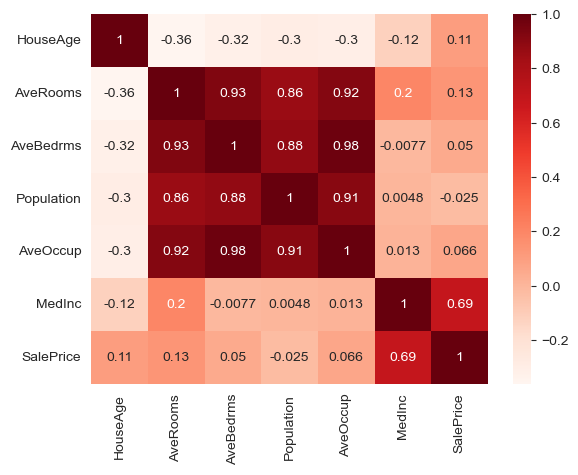

In [13]:
cor_list = df.drop(['Longitude' , 'Latitude'] ,axis =1 )
sns.heatmap(cor_list.corr() ,annot= True ,cmap = 'Reds' )

<AxesSubplot:>

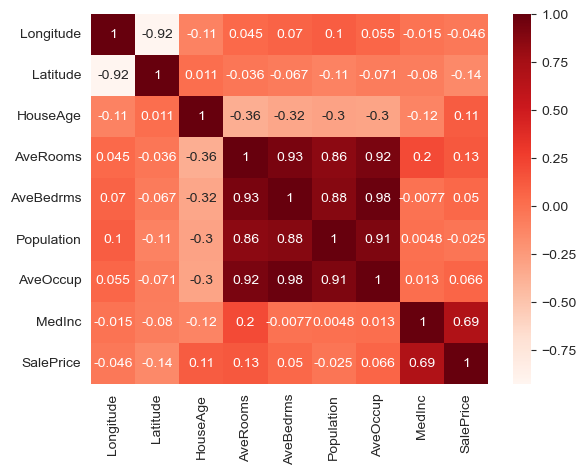

In [14]:
sns.heatmap(df.corr() ,annot= True ,cmap = 'Reds' )

Split the Data and Scaling

In [15]:
X = df[['MedInc','HouseAge','Population','Longitude','Latitude']]
y = df['SalePrice']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lreg =LinearRegression()
lreg.fit(X_train , y_train)
a,b = (lreg.coef_ , lreg.intercept_)
print("coefficients  " , a)
print("intercept   ",b)

coefficients   [ 3.77030403e+04  9.32383466e+02 -5.89936673e-01 -4.57833626e+04
 -4.50904834e+04]
intercept    -3832533.3118368112


Text(0, 0.5, 'predicted price')

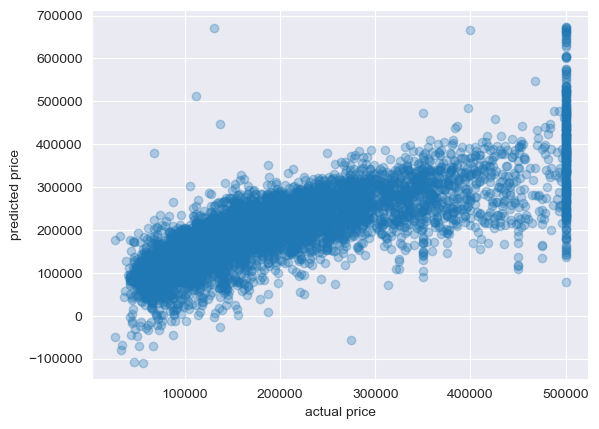

In [18]:
pred_test = lreg.predict(X_test)
plt.scatter( y_test,pred_test ,alpha=0.3)
plt.xlabel("actual price")
plt.ylabel("predicted price")

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

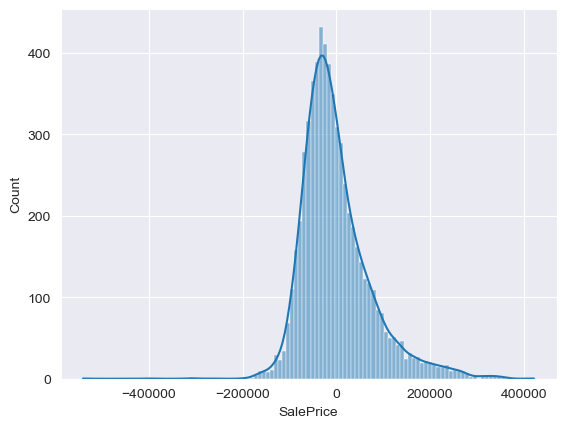

In [19]:
resid = y_test - pred_test
sns.histplot(resid,kde=True)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test,pred_test)
r2 = r2_score(y_test,pred_test)
print('MAE = '+ str(mae))
print('MSE = ' + str(mse))
print('RMSE = ' + str(mse**0.5))
print('R^2 = '+str(r2))

MAE = 54892.60975645369
MSE = 5562306080.339797
RMSE = 74580.8693991951
R^2 = 0.5896919352967653
